In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import math

In [2]:
def open_file(filename):
    txt_file = open(filename+".txt")
    read_txt = pandas.read_csv(txt_file, delimiter="\t")
    return np.array(read_txt)

In [3]:
#geiger = '_cinza'
geiger = '_preto'

In [4]:
dead_time = open_file('plato'+geiger)

In [5]:
dead_time[:,0]

array([475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
       540, 545, 550, 555, 560, 565, 570, 575, 580])

In [6]:
dead_time[:,1]

array([    0,  2273,  2229,  2363,  2389,  2387,  2438,  2379,  2474,
        2622,  2530,  2741,  2791,  3097,  3146,  3716,  4089,  5445,
        4998,  5737,  6498, 17647])

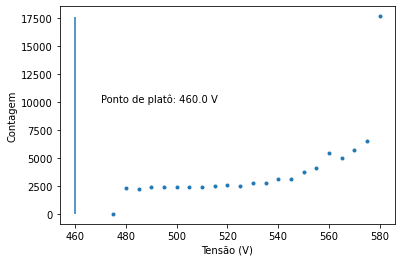

In [7]:
voltage = dead_time[:,0]
counts = dead_time[:,1]
z = np.polyfit(voltage[3:7], counts[3:7], 1)
xp = np.linspace(330, 850, 100)
p = np.poly1d(z)
#plt.plot(voltage, counts, '.', xp, p(xp), '-')
plt.plot(voltage, counts, '.')
#plt.yscale('log')
plt.vlines(x=330+0.25*(850-330),ymin=0, ymax=17600)
plt.text(s='Ponto de platô: {0:.1f} V'.format(330+0.25*(850-330)), y = 10000, x=10+330+0.25*(850-330))
plt.xlabel("Tensão (V)")
plt.ylabel("Contagem")
plt.show()

Tomada de dados com a fonte 1:

In [8]:
fonte1 = open_file('fonte1'+geiger)[:,2]

In [9]:
fonte1

array([1190, 1186, 1209, 1214, 1263, 1283, 1266, 1287, 1164, 1259, 1286,
       1279, 1214, 1225, 1198, 1280, 1284, 1218, 1232, 1230, 1240, 1240,
       1262, 1223, 1244, 1257, 1196, 1229, 1244, 1237, 1245, 1263, 1243,
       1249, 1210, 1188, 1239, 1297, 1273, 1281, 1160, 1237, 1236, 1222,
       1231, 1246, 1310, 1249, 1192, 1212, 1247, 1234, 1244, 1272, 1231,
       1178, 1243, 1234, 1220], dtype=object)

In [10]:
fonte1_mean = fonte1.mean()
fonte1_error = math.sqrt(fonte1_mean/59)
fonte1_error = fonte1_error/math.sqrt(59)

In [11]:
fonte1_mean

1237.7118644067796

In [12]:
fonte1_error

0.5962903284636113

Tomada de dados com a fonte 2:

In [13]:
fonte2 = open_file('fonte2'+geiger)[:,2]

In [14]:
fonte2

array([1212, 1257, 1227, 1211, 1173, 1159, 1219, 1221, 1277, 1196, 1327,
       1213, 1232, 1145, 1215, 1235, 1256, 1212, 1228, 1191, 1243, 1262,
       1218, 1157, 1203, 1197, 1222, 1214, 1190, 1244, 1223, 1184, 1233,
       1152, 1201, 1267, 1183, 1213, 1224, 1221, 1258, 1202, 1189, 1160,
       1218, 1254, 1234, 1217, 1225, 1207, 1228, 1165, 1178, 1282, 1219,
       1203, 1183, 1250, 1202], dtype=object)

In [15]:
fonte2_mean = fonte2.mean()
fonte2_error = math.sqrt(fonte2_mean/59)
fonte2_error = fonte2_error/math.sqrt(59)

In [16]:
fonte2_mean

1215.7796610169491

In [17]:
fonte2_error

0.5909835945483306

Tomada de dados com as duas fontes:

In [18]:
fonte12 = open_file('fonte12'+geiger)[:,2]

In [19]:
fonte12

array([2291, 2279, 2250, 2358, 2317, 2277, 2478, 2363, 2339, 2330, 2167,
       2359, 2267, 2298, 2318, 2342, 2345, 2364, 2360, 2309, 2297, 2279,
       2383, 2336, 2269, 2300, 2207, 2256, 2380, 2390, 2405, 2332, 2339,
       2437, 2355, 2348, 2398, 2312, 2360, 2269, 2368, 2448, 2328, 2294,
       2373, 2417, 2260, 2347, 2323, 2368, 2294, 2262, 2335, 2287, 2326,
       2328, 2324, 2267, 2311], dtype=object)

In [20]:
fonte12_mean = fonte12.mean()
fonte12_error = math.sqrt(fonte12_mean/59)
fonte12_error = fonte12_error/math.sqrt(59)

In [21]:
fonte12_mean

2327.508474576271

In [22]:
fonte12_error

0.8176992959710224

In [23]:
back = open_file('fundo'+geiger)[:,2]

In [24]:
back

array([83, 87, 97, 82, 90, 81, 85, 84, 82, 82, 91, 92, 94, 101, 83, 72,
       95, 98, 81, 88, 108, 86, 71, 97, 104, 72, 83, 93, 79, 94, 101, 81,
       104, 77, 86, 78, 92, 102, 95, 80, 88, 81, 81, 63, 77, 70, 97, 85,
       102, 74, 87, 80, 94, 86, 82, 84, 84, 88, 82], dtype=object)

In [25]:
back_mean = back.mean()
back_error = math.sqrt(back_mean/59)
back_error = back_error/math.sqrt(59)

In [26]:
back_mean

86.71186440677967

In [27]:
back_error

0.15782916193472613

In [28]:
R1 = fonte1_mean - back_mean
R1_error = math.sqrt(fonte1_error**2 + back_error**2)

In [29]:
R1

1151.0

In [30]:
R1_error

0.6168242863054757

In [31]:
R2 = fonte2_mean - back_mean
R2_error = math.sqrt(fonte2_error**2 + back_error**2)

In [32]:
R2

1129.0677966101696

In [33]:
R2_error

0.61169571960435

In [34]:
R12 = fonte12_mean - back_mean
R12_error = math.sqrt(fonte12_error**2 + back_error**2)

In [35]:
R12

2240.7966101694915

In [36]:
R12_error

0.8327918005050985

In [37]:
print('R1: {0:.3f} +/- {1:.3f} Hz'.format(R1,R1_error))
print('R2: {0:.3f} +/- {1:.3f} Hz'.format(R2,R2_error))
print('R12: {0:.3f} +/- {1:.3f} Hz'.format(R12,R12_error))

R1: 1151.000 +/- 0.617 Hz
R2: 1129.068 +/- 0.612 Hz
R12: 2240.797 +/- 0.833 Hz


In [38]:
dead_time = (R1 + R2 - R12)/(2*R1*R2)

In [39]:
sigma_R1 = (R12-R2)/(2*R1*R1*R2)

In [40]:
sigma_R1

3.716192463627597e-07

In [41]:
sigma_R2 = (R12-R1)/(2*R2*R2*R1)

In [42]:
sigma_R2

3.7136424905058043e-07

In [43]:
sigma_R12 = 1/(2*R1*R2)

In [44]:
sigma_R12

3.8474648434639365e-07

In [45]:
((R12-R2)/(2*R1*R1*R2)*R1_error)**2

5.2543539673994247e-14

In [46]:
R2_error**2/(2*R1*R2)**2

5.5388576424794474e-14

In [47]:
((R12-R1)/(2*R2*R2*R1)*R2_error)**2

5.1602538606070076e-14

In [48]:
dead_time_error = math.sqrt(((R12-R2)/(2*R1*R1*R2)*R1_error)**2+((R12-R1)/(2*R2*R2*R1)*R2_error)**2+R2_error**2/(2*R1*R2)**2)

In [49]:
print('dead time: {0:.5f} +/- {1:.5f} ms'.format(dead_time*10e3*59,dead_time_error*10e3*59))

dead time: 8.91458 +/- 0.23566 ms
